In [41]:
using LibSerialPort

list_ports() 

ser = open("COM3", 9600)

r = readbytes!(ser, bytesavailable(ser)) #clear 

# Start a conversion
write(ser, "c")

while bytesavailable(ser) < 1
    continue 
end
sleep(0.05)

r = readbytes!(ser,bytesavailable(ser)) #clear 

# Get the values
write(ser, "p") # Print DMA buffer

while bytesavailable(ser) < 1
    continue # wait for a response
end
a = []
i = 0
while true
    if bytesavailable(ser) < 1
        sleep(0.005) # Wait and check again
        if bytesavailable(ser) < 1
            break
        end
    end
    b = readline(ser)
    push!(a,b)  
end   

print(i)
                    
close(ser)

COM3
	Description:	USB Serial Device (COM3)
	Transport type:	SP_TRANSPORT_USB
5413

SerialPort(Ptr{LibSerialPort.SPPort} @0x000000002d08b430, false, false)

In [ ]:
values = parse(Int64,strip(.a, ['\r','\n']))

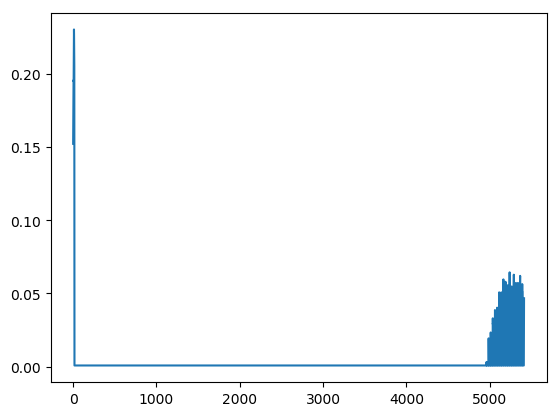

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002A0B3278>

In [42]:
using PyPlot
receive = (3.3/4096).*a
figure()
plot(receive)

In [38]:
v_tx = 

print(length(v_tx))
figure() # Create a new figure
title("basic transmitted pulse")
xlabel("Time in seconds")
plot(v_tx) # Basic plot, axis labeled in samples

UndefVarError: UndefVarError: v_tx not defined

In [ ]:
#to see the freqeuncy domain use FFT function
using FFTW 
V_TX = fft(v_tx);

figure()
title("FFT of transmitted pulse on sampling axis")
xlabel("Frequency in Hz")
plot( abs.(V_TX) )

In [ ]:
v_rx = receive

using PyPlot

figure() # Create a new figure
title("received pulse")
plot(v_rx) # Basic plot, axis labeled in samples

In [ ]:
using FFTW 
V_RX = fft(v_rx);

figure()
title("FFT of received pulse for both point targets")
plot( abs.(V_RX) )

In [ ]:
H = conj( V_TX);

V_MF = H.*V_RX;
v_mf = ifft(V_MF);

figure()
plot( abs.(V_MF) )

figure() # Create a new figure
xlabel("Time in seconds")
title(" Match Filtered output of received pulse with both point targets")
plot(t,v_mf) # Basic plot, axis labeled in samples

In [ ]:
V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);

V_ANAL = 2*V_MF; # make a copy and double the values
N = length(V_MF);
if mod(N,2)==0 # case N even
    neg_freq_range = Int(N/2):N; # Define range of “neg-freq” components
else # case N odd
    neg_freq_range = Int((N+1)/2):N;
end

V_ANAL[neg_freq_range] .= 0; # Zero out neg components in 2nd half of array.
v_anal = ifft(V_ANAL);

In [ ]:
figure()
title("Analytic signal")
xlabel("Range in meters")
plot(r,abs.(v_anal))

In [ ]:
j=im; # Assign j as sqrt(-1) (“im” in julia)
v_bb = v_anal.*exp.(-j*2*pi*f0.*t);

In [ ]:
figure()
subplot(2,1,1)
plot(r,abs.(v_bb))
subplot(2,1,2)
plot(r,angle.(v_bb)) #query

In [ ]:
V_BB = fft(v_bb); 
figure()
plot(abs.(v_bb))